### Grid based-filter design


In [2]:
import os

# set the current working directory
curr_path = os.getcwd().split("/")[:-1]
curr_path = "/".join(curr_path)
os.chdir(curr_path)

In [3]:
import numpy as np
import matplotlib.pyplot as plt

from sclibrary.network_reader import NetworkReader
from sclibrary.simplicial_complex import SimplicialComplexNetwork
from sclibrary.plot import SCPlot

In [4]:
data_folder = 'data/paper_data'

# read csv
filename = data_folder + '/edges.csv'
delimeter = " "
src_col = 'Source'
dest_col = 'Target'
feature_cols = ['Distance']

G = NetworkReader.read_csv(filename=filename, delimeter=delimeter, 
                           src_col=src_col, dest_col=dest_col, feature_cols=feature_cols)

simplices = G.simplicies(condition="distance", dist_col_name="Distance", dist_threshold=1.5)

# coordinates
filename = data_folder + '/coordinates.csv'
coordinates = NetworkReader.get_coordinates(filename=filename, 
                                            node_id_col="Id", 
                                            x_col='X', 
                                            y_col='Y', 
                                            delimeter=" ")


# create a simplicial complex network
sc = SimplicialComplexNetwork(simplices=simplices)
# create a plot
scplot = SCPlot(sc, coordinates)

In [5]:
f0 = np.array([
    2.25,
    0.13,
    1.72,
    -2.12,
    1.59,
    1.08,
    -0.30,
    -0.21,
    1.25,
    1.45,
])

f = np.array([
    2.90,
    0.25, 
    1.78,
    -1.50,
    1.76,
    1.53,
    1.32,
    0.08,
    0.67, 
    1.73
])

Text(0.5, 0, 'Filter size')

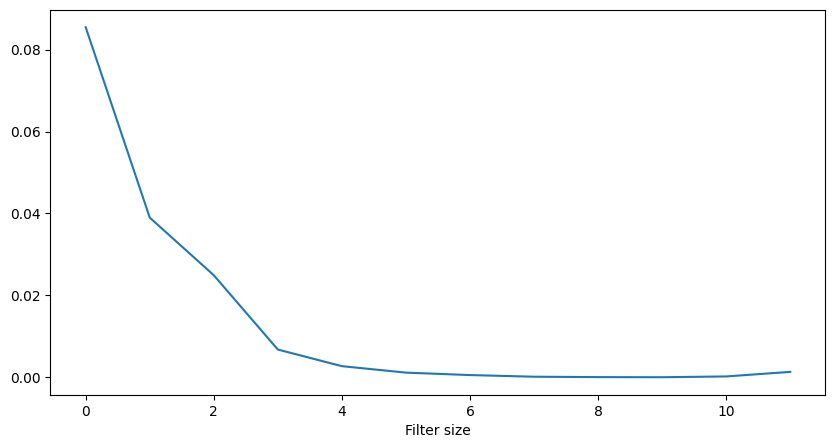

In [34]:
from sclibrary.grid_based_filter_design import GridBasedFilterDesign

filter_range = range(12)

gbf = GridBasedFilterDesign(sc)
gbf.apply_filter(f0=f0, f=f, filter_range=filter_range)

# plot the error
plt.figure(figsize=(10, 5))
plt.plot(gbf.errors, label="Error")
plt.xlabel("Filter size")